<h1>Algoritmo de Grover con Cirq</h1>

En este notebook, implementaremos el algoritmo de Grover utilizando **Cirq**, un framework de Google para la computación cuántica. Exploraremos tanto la teoría subyacente como la implementación práctica del algoritmo.

 <h2>1. Configuración inicial</h2>



 Para poder ejecutar este Notebook, hace falta instalar las dependencias. Para ello, creamos un entorno virtual y hacemos `pip install -r requirements.txt`.



 Antes de poder hacer eso, debemos tener instalado Rust para poder usar el paquete `cirq`.



 Se recomienda usar WSL o Linux para ello, y escribir en la consola el siguiente comando:



 ```console

      curl --proto '=https' --tlsv1.2 -sSf https://sh.rustup.rs | sh`

 ```

 y proceder con la instalación por defecto.

  <h2>2. Importar librerías necesarias</h2>







  A continuación, importamos las librerías requeridas.

In [8]:
import cirq
import numpy as np
import matplotlib.pyplot as plt



<h2>3. Fundamentos Teóricos del Algoritmo de Grover</h2>

### 3.1. Introducción

El **algoritmo de Grover** es un algoritmo cuántico diseñado para realizar búsquedas en una base de datos no estructurada de manera eficiente. Este algoritmo proporciona una ventaja significativa frente a los algoritmos clásicos, reduciendo el número de operaciones necesarias de \( O(N) \) a \( O(\sqrt{N}) \). donde \( N \) es el tamaño de la base de datos.
 
### 3.2. Componentes Clave

1. **Oráculo de Grover**: Una operación que marca el estado objetivo invirtiendo su amplitud de fase.
2. **Operador Difusor**: Amplifica la amplitud del estado marcado, incrementando así su probabilidad de ser medido.
3. **Estado Inicial**: Todos los estados están en una superposición equitativa gracias a las puertas de Hadamard.

### 3.3. Ventajas Cuánticas

A diferencia de los algoritmos clásicos que requieren \( O(N) \) operaciones para una búsqueda no estructurada, Grover logra esto en \( O(\sqrt{N}) \) operaciones, proporcionando una ventaja cuadrática significativa.

<h2>4. Definición de los Qubits</h2>
 
Definimos los qubits que utilizaremos en nuestro circuito cuántico.
 
- **Qubits 0 y 1**: Representan los datos a buscar.
- **Qubit 2**: Es un qubit ancilla utilizado para operaciones controladas.


In [9]:
# Definimos 3 qubits
qubits = [cirq.LineQubit(i) for i in range(3)]



<h2>5. Oráculo de Grover</h2>
 
El oráculo es una función cuántica que marca el estado objetivo. En este caso, identificaremos el estado \(|11\rangle\).
 
### 5.1. Implementación del Oráculo

El oráculo utiliza puertas \( X \) para preparar el estado objetivo, una puerta Toffoli para invertir la amplitud del estado objetivo y nuevamente puertas \( X \) para restaurar los qubits a su estado original.


In [10]:
# Oráculo para marcar el estado objetivo |11>
def grover_oracle(qubits):
    # Este oráculo debe marcar el estado |11>
    circuit = cirq.Circuit()
    # Aplicar puertas X a los dos primeros qubits para preparar el estado objetivo |11>
    circuit.append([cirq.X(qubits[0]), cirq.X(qubits[1])])
    # Aplicar una puerta Toffoli para invertir la amplitud si ambos controles están en |1>
    circuit.append(cirq.TOFFOLI(qubits[0], qubits[1], qubits[2]))
    # Aplicar nuevamente puertas X para restaurar el estado original
    circuit.append([cirq.X(qubits[0]), cirq.X(qubits[1])])
    return circuit



<h2>6. Operador Difusor</h2>

El operador difusor realiza una reflexión respecto a la media de las amplitudes, amplificando así la amplitud del estado marcado.
 
### 6.1. Implementación del Operador Difusor

El operador difusor aplica puertas de Hadamard, puertas \( X \), una puerta Toffoli y luego revierte las operaciones iniciales.


In [11]:
# Operador difusor
def diffusion_operator(qubits):
    # Este es el operador difusor, también conocido como "inversión sobre la media"
    circuit = cirq.Circuit()
    # Aplicar puertas Hadamard a todos los qubits (excepto el ancilla)
    circuit.append(cirq.H.on_each(*qubits[:2]))
    # Aplicar puertas X a todos los qubits (excepto el ancilla)
    circuit.append(cirq.X.on_each(*qubits[:2]))
    # Aplicar una puerta Toffoli
    circuit.append(cirq.TOFFOLI(qubits[0], qubits[1], qubits[2]))
    # Reaplicar puertas X
    circuit.append(cirq.X.on_each(*qubits[:2]))
    # Reaplicar puertas Hadamard
    circuit.append(cirq.H.on_each(*qubits[:2]))
    return circuit



<h2>7. Construcción del Circuito Completo</h2>
 
Combinamos el oráculo y el operador difusor para construir el circuito completo del algoritmo de Grover.

### 7.1. Estado Inicial

Inicializamos los qubits de datos en una superposición equitativa aplicando puertas de Hadamard.

### 7.2. Iteraciones de Grover
 
Alternamos entre el oráculo y el operador difusor. El número óptimo de iteraciones para maximizar la probabilidad de encontrar el estado objetivo es aproximadamente \( \frac{\pi}{4} \sqrt{N} \).

### 7.3. Medición

Finalmente, medimos los qubits de datos para determinar el estado objetivo.


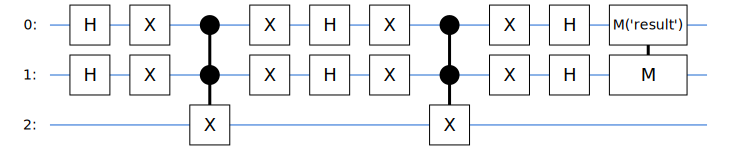

In [12]:
# Construir el circuito corregido
corrected_circuit = cirq.Circuit()

# Estado inicial: superposición
corrected_circuit.append(cirq.H.on_each(*qubits[:2]))

# Iteraciones de Grover
iterations = 1  # Solo una iteración, suficiente para un espacio pequeño
for _ in range(iterations):
    corrected_circuit += grover_oracle(qubits)
    corrected_circuit += diffusion_operator(qubits)

# Medición
corrected_circuit.append(cirq.measure(*qubits[:2], key='result'))

# Mostrar el circuito corregido usando SVGCircuit
from cirq.contrib.svg import SVGCircuit
SVGCircuit(corrected_circuit)



<h2>8. Simulación del Circuito</h2>

Utilizamos el simulador de Cirq para ejecutar el circuito varias veces y analizar los resultados.


In [13]:
# Simulador de Cirq
simulator = cirq.Simulator()

# Ejecutar el circuito
result = simulator.run(corrected_circuit, repetitions=1000)

# Mostrar resultados
print("Resultados de la simulación:")
print(result.histogram(key='result'))


Resultados de la simulación:
Counter({0: 610, 3: 140, 2: 131, 1: 119})


<h2>9. Visualización de Resultados</h2>

Graficamos un histograma para visualizar la distribución de los estados medidos.


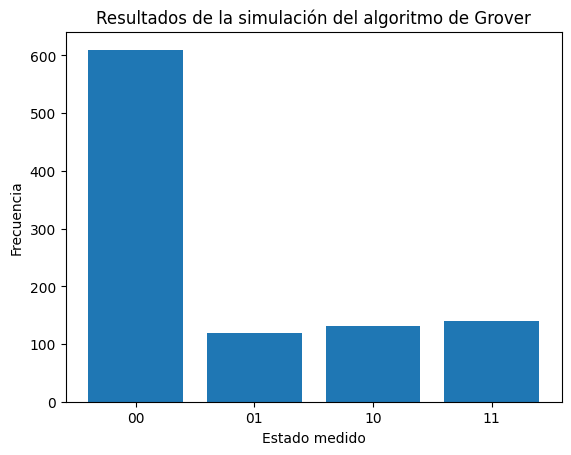

In [14]:
def plot_histogram(result):
    histogram = result.histogram(key="result")
    plt.bar(histogram.keys(), histogram.values(), tick_label=[f'{k:02b}' for k in histogram.keys()])
    plt.xlabel('Estado medido')
    plt.ylabel('Frecuencia')
    plt.title('Resultados de la simulación del algoritmo de Grover')
    plt.show()

# Graficar resultados
plot_histogram(result)


<h2>10. Conclusiones</h2>
En este notebook, hemos implementado el <b>algoritmo de Grover</b> utilizando <b>Cirq</b>, un framework de computación cuántica. Hemos visto cómo el algoritmo utiliza el oráculo y el operador difusor para amplificar la amplitud del estado objetivo, permitiendo así encontrar la solución con una alta probabilidad en un número reducido de iteraciones.

### 10.1. Puntos Clave

- **Ventaja Cuántica**: Grover proporciona una ventaja cuadrática sobre los algoritmos clásicos en problemas de búsqueda no estructurada.
- **Componentes Principales**: Oráculo de Grover y operador difusor son esenciales para el funcionamiento del algoritmo.
- **Implementación Práctica**: Cirq facilita la construcción y simulación de circuitos cuánticos de manera eficiente.
 
### 10.2. Posibles Extensiones

- **Aumentar el Tamaño de la Base de Datos**: Implementar Grover en una base de datos más grande para observar la escalabilidad.
- **Optimización de Iteraciones**: Experimentar con diferentes números de iteraciones para encontrar el óptimo en distintos escenarios.
- **Implementación en Hardware Cuántico**: Ejecutar el algoritmo en un dispositivo cuántico real para evaluar el impacto del ruido y otros factores prácticos.
